<a href="https://colab.research.google.com/github/fenicXs/Automatic-Attendance-System-using-Face-Recognition/blob/main/Treatment_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.9 MB/s eta 0:00:00


In [ ]:
!pip install -q transformers==4.46.2 pytorch-lightning==2.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 54.6 MB/s eta 0:00:00


In [ ]:
!pip install -q transformers accelerate bitsandbytes

In [ ]:
from PIL import Image

In [ ]:
from IPython import display
display.clear_output()
from IPython.display import display

In [ ]:
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor
import torch
from PIL import Image
import numpy as np

In [ ]:
output_dir = "/content/drive/MyDrive/Segformer_b0/segformer_finetuned_model"

model = SegformerForSemanticSegmentation.from_pretrained(output_dir)

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
feature_extractor.do_reduce_labels = False
feature_extractor.size = 128

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


In [ ]:
custom_image_path = "/content/rust0007.jpg"
input_image = Image.open(custom_image_path)


encoded_inputs = feature_extractor(input_image, return_tensors="pt")
pixel_values = encoded_inputs["pixel_values"]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

with torch.no_grad():
    outputs = model(pixel_values.to(device))
    logits = outputs[0]

In [ ]:
type(outputs)

tuple

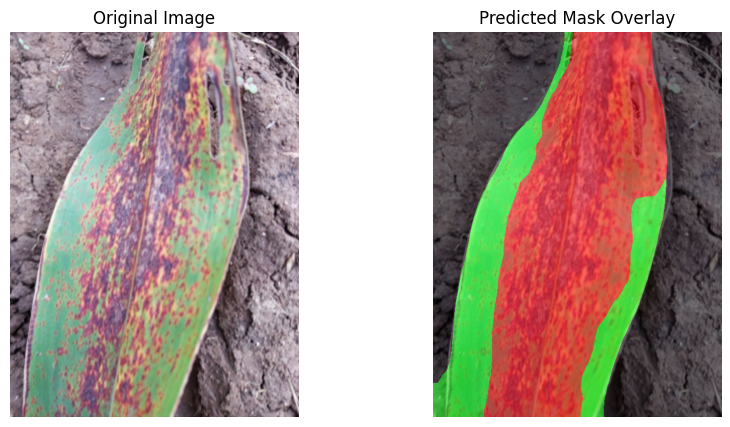

In [ ]:
upsampled_logits = torch.nn.functional.interpolate(
    logits,
    size=input_image.size[::-1],
    mode="bilinear",
    align_corners=False
)


predicted_mask = upsampled_logits.argmax(dim=1).squeeze().cpu().numpy()

color_map = {
    0:(0,0,0),
    1:(0,255,0),
    2:(255,0,0),
}

def prediction_to_vis(prediction, color_map):
    vis_shape = prediction.shape + (3,)
    vis = np.zeros(vis_shape)
    for i,c in color_map.items():
        vis[prediction == i] = color_map[i]
    return Image.fromarray(vis.astype(np.uint8))

predicted_mask_image = prediction_to_vis(predicted_mask, color_map)

predicted_mask_image = predicted_mask_image.resize(input_image.size)
predicted_mask_image = predicted_mask_image.convert("RGBA")
input_image_rgba = input_image.convert("RGBA")
overlay_img = Image.blend(input_image_rgba, predicted_mask_image, 0.5)

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(overlay_img)
plt.title("Predicted Mask Overlay")
plt.axis('off')

plt.show()

In [ ]:
import numpy as np

overlay_array = np.array(predicted_mask_image)

red = [255, 0, 0, 255]
green = [0, 255, 0, 255]
black = [0, 0, 0, 255]

red_pixels = np.count_nonzero(np.all(overlay_array == red, axis=2))
green_pixels = np.count_nonzero(np.all(overlay_array == green, axis=2))
black_pixels = np.count_nonzero(np.all(overlay_array == black, axis=2))

print(f"Number of red pixels: {red_pixels}")
print(f"Number of green pixels: {green_pixels}")
print(f"Number of black pixels: {black_pixels}")

Number of red pixels: 130097
Number of green pixels: 53341
Number of black pixels: 149395


In [ ]:
total = red_pixels + green_pixels
estimate_damage = red_pixels / total
print(f"Estimated damage: {estimate_damage * 100} %")

Estimated damage: 70.92151026504868 %


# **MISTRAL**

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch

In [ ]:
model_id = "mistralai/Mistral-7B-Instruct-v0.1"

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.float16,
    load_in_8bit=True
)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto"
)

In [ ]:
disease_type = "Rust"
damage_percentage = estimate_damage
environmental_data = {
    "temperature": "29°C",
    "humidity": "75%",
    "soil_moisture": "Moderate"
}

prompt = f"""<s>[INST]
You are an expert agricultural advisor. Given the following inputs, suggest an effective treatment plan:

- Disease: {disease_type}
- Damage Level: {damage_percentage}%
- Temperature: {environmental_data['temperature']}
- Humidity: {environmental_data['humidity']}
- Soil Moisture: {environmental_data['soil_moisture']}

Include:
1. Organic treatment options
2. Chemical treatment options
3. Prevention tips
4. Urgency of treatment
[/INST]"""


In [ ]:
response = pipe(prompt, max_new_tokens=300, do_sample=True, temperature=0.7)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [ ]:
print("Treatment Recommendation:\n")
print(response.split("[/INST]")[-1].strip())

Treatment Recommendation:

1. Organic Treatment Options:
Rust can be controlled using natural methods such as crop rotation, composting, and organic fertilizers. These methods help to improve soil health and increase resistance to diseases.

2. Chemical Treatment Options:
Chemical treatments such as fungicides and bactericides can be used to control rust. However, it is important to note that the long-term use of these chemicals can have negative effects on the environment and human health.

3. Prevention Tips:
To prevent rust, it is important to maintain good soil health by adding organic matter, improving drainage, and reducing tillage. Additionally, proper irrigation and fertilization can help to maintain moderate moisture levels in the soil.

4. Urgency of Treatment:
The urgency of treatment depends on the severity of the rust damage. If the damage is mild, it may not be necessary to take immediate action. However, if the damage is severe, it is important to take action as soon as 

# **CUSTOM INPUT (do not run)**

In [ ]:
disease_type = "Rust"
damage_percentage = estimate_damage
environmental_data = {
    "temperature": "29°C",
    "humidity": "75%",
    "soil_moisture": "Moderate"
}

In [ ]:
response = pipe(prompt, max_new_tokens=300, do_sample=True, temperature=0.7)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [ ]:
print("Treatment Recommendation:\n")
print(response.split("[/INST]")[-1].strip())

Treatment Recommendation:

1. Organic treatment options:
- Organic copper fungicides such as copper hydroxide and copper sulfate can be used to treat rust.
- Neem oil can also be applied to the affected areas to help prevent the spread of rust.
- Organic fertilizers can be used to improve soil health and boost plant resistance to rust.

2. Chemical treatment options:
- Fungicides containing active ingredients such as thiophan-methyl, azoxystrobin, and flutolan can be used to treat rust.
- Fungicides can be applied through spraying or drenching the affected areas.
- It is important to follow the manufacturer's instructions carefully when applying chemical treatments.

3. Prevention tips:
- Proper irrigation and drainage can help prevent soil moisture from remaining stagnant, which can promote rust growth.
- Regularly removing dead plant material from the soil can prevent debris from accumulating and providing a breeding ground for rust.
- Rotating crops can also help prevent rust by dis